## The Sparks Foundation Internship

## Prediction using Decision Tree Algorithm

## Batch : #GRIPFEBRUARY24

## Author : J  Suganya

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [138]:
df=pd.read_csv('Iris.csv')
df.head(5) ## ist five rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape ## 150 rows and 6 columns

(150, 6)

In [5]:
df.size

900

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [139]:
num=df.select_dtypes(include=np.number).columns.to_list()
num

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [4]:
cat=df.select_dtypes(include=object).columns.to_list()
cat

['Species']

## 5 point summary

In [10]:
df[num].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df[cat].describe()

,Species
count,150
unique,3
top,Iris-setosa
freq,50


## Univariant Analysis

## Numeric

In [12]:
df[num].skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [ ]:
## petallength and petalwidth are slightly negative skewed where as sepallength and sepal width are slightly positively skewed

In [13]:
df[num].kurt()

Id              -1.200000
SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

## visualize the distribution of all the numerical columns and cat variables

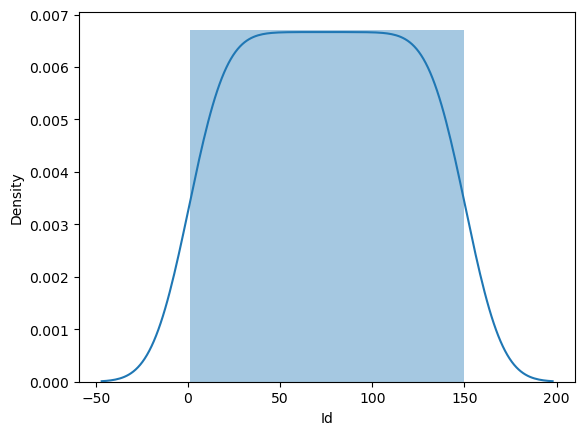

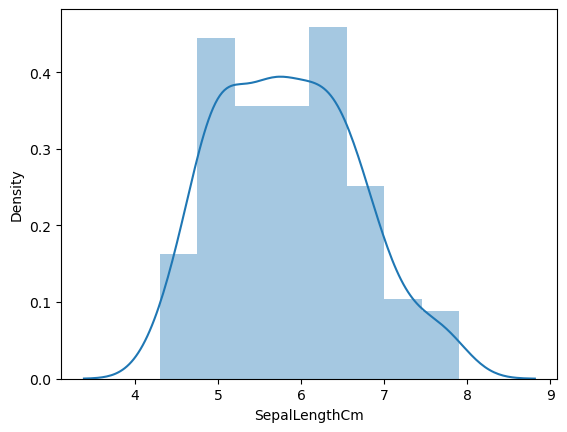

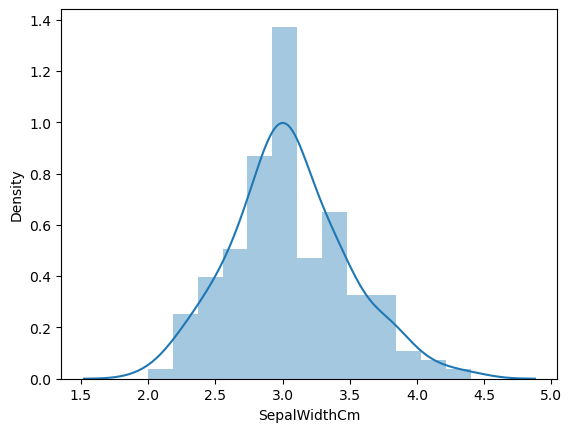

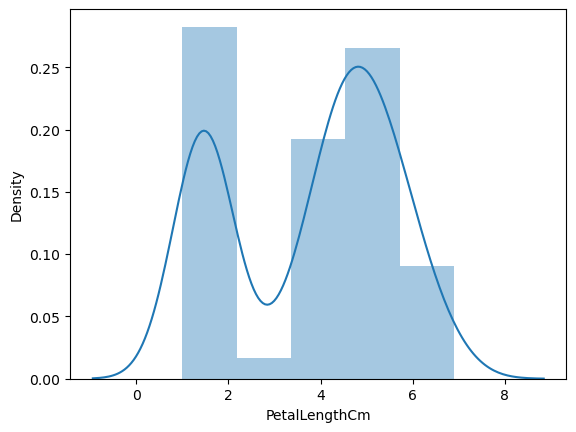

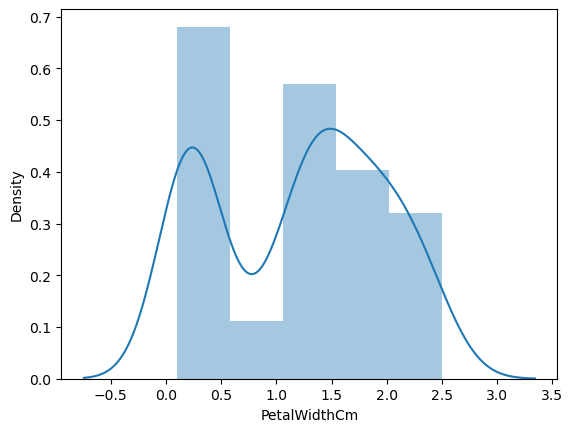

In [14]:
for i in num:
    sns.distplot(df[i])
    plt.show()

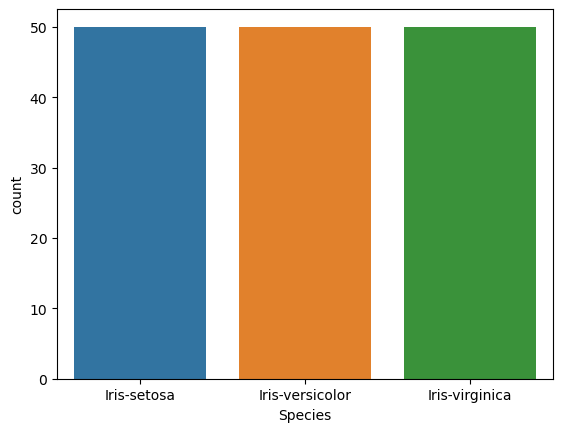

In [15]:
for i in cat:
    sns.countplot(x=df[i])
    plt.show()

In [ ]:
## thus the data is balanced dataset

## Outliers

<Axes: >

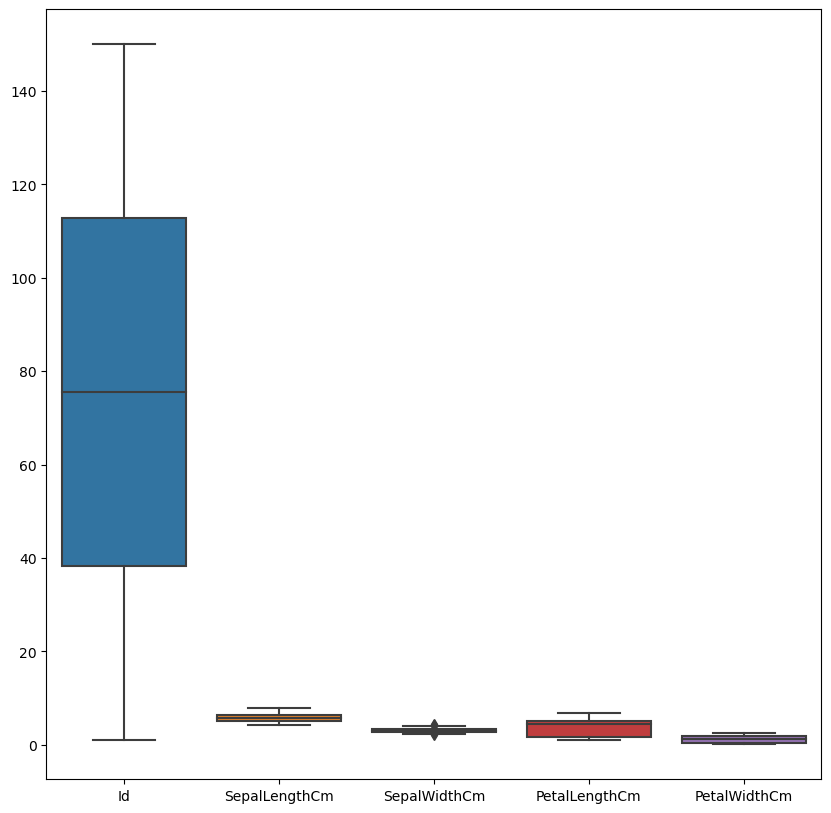

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

In [33]:
num

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [35]:
def finding_outliers(data):
    outliers=[]
    data=sorted(data)
    
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    
    IQR=q3-q1
    
    ll=q1-(1.5*IQR)
    ul=q3+(1.5*IQR)
    
    for i in data:
        if (i<ll or i>ul):
            outliers.append(i)
    return outliers


for i in df[num]:
    outliers_list=finding_outliers(df[i])
    print('outliers in',i,'feature :',outliers_list)

outliers in Id feature : []
outliers in SepalLengthCm feature : []
outliers in SepalWidthCm feature : [2.0, 4.1, 4.2, 4.4]
outliers in PetalLengthCm feature : []
outliers in PetalWidthCm feature : []


In [36]:
## here we could find 4 outliers in feature named SepalWidthCm with , 
## here it is only 150 rows in number so im not going to treat it ,

## Bivariant Analysis

## Numerical Vs Numerical

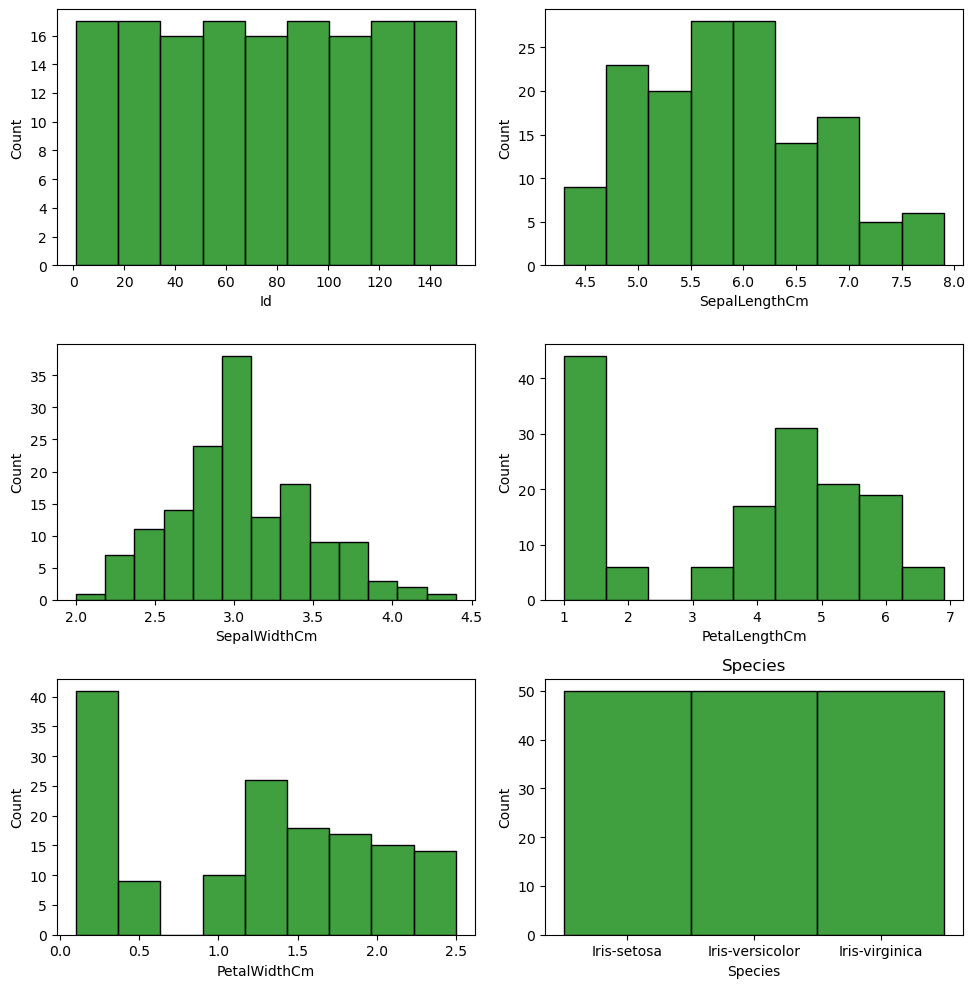

In [143]:
fig,ax=plt.subplots(3,2 , figsize=(10,10))

for i ,subplot in zip(df,ax.flatten()):
    sns.histplot(df[i],ax=subplot,color='green')
    plt.title(i)
plt.tight_layout()    
plt.show()

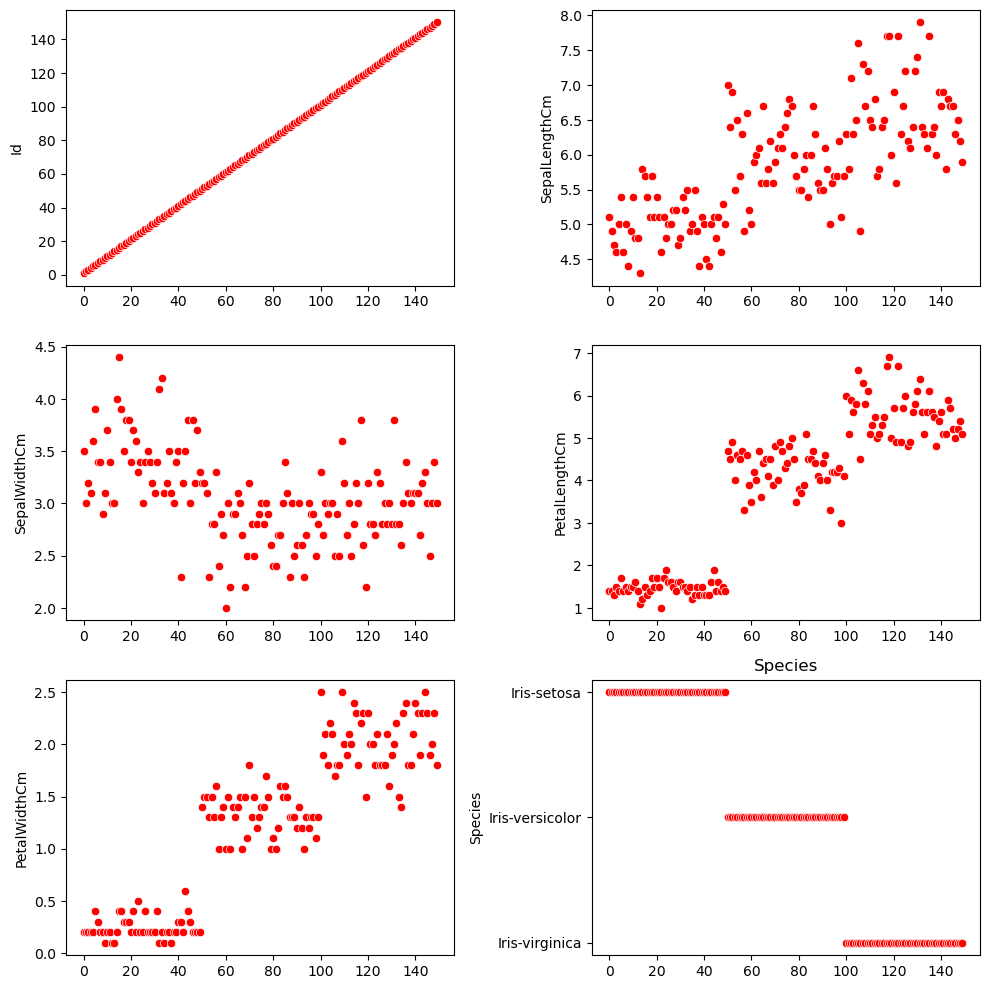

In [44]:
fig,ax=plt.subplots(3,2 , figsize=(10,10))

for i ,subplot in zip(df,ax.flatten()):
    sns.scatterplot(df[i],ax=subplot,color='red')
    plt.title(i)
plt.tight_layout()    
plt.show()

## Numerical Vs categorical

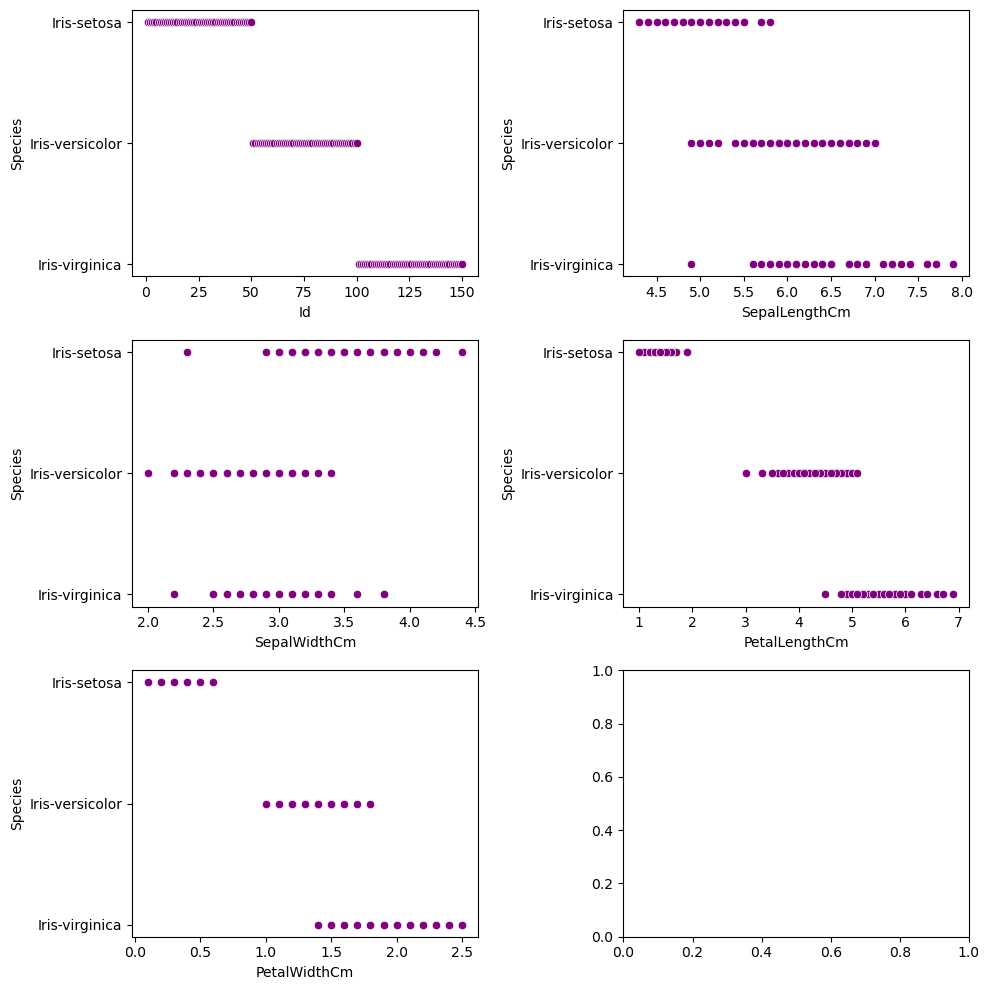

In [141]:
fig, ax= plt.subplots(3,2, figsize=(10,10))

for i, subplot in zip(num, ax.flatten()):
    sns.scatterplot(x=df[i],y=df.Species, ax=subplot,color='purple')
    #plt.title('df[i]')

plt.tight_layout()
plt.show()

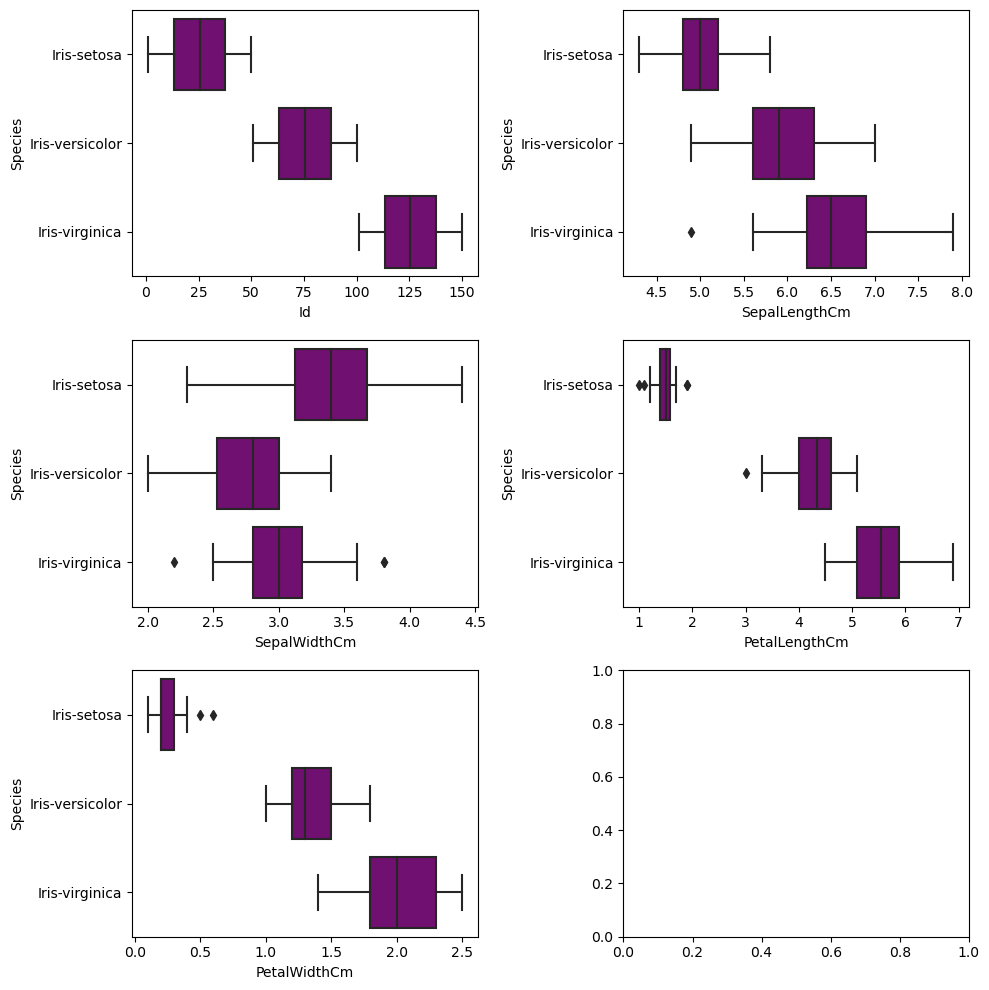

In [142]:
fig, ax= plt.subplots(3,2, figsize=(10,10))

for i, subplot in zip(num, ax.flatten()):
    sns.boxplot(x=df[i],y=df.Species, ax=subplot,color='purple')
    #plt.title('df[i]')

plt.tight_layout()
plt.show()

In [46]:
df.isnull().sum()/df.shape[0]*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [47]:
## no null values

In [48]:
## heatmap

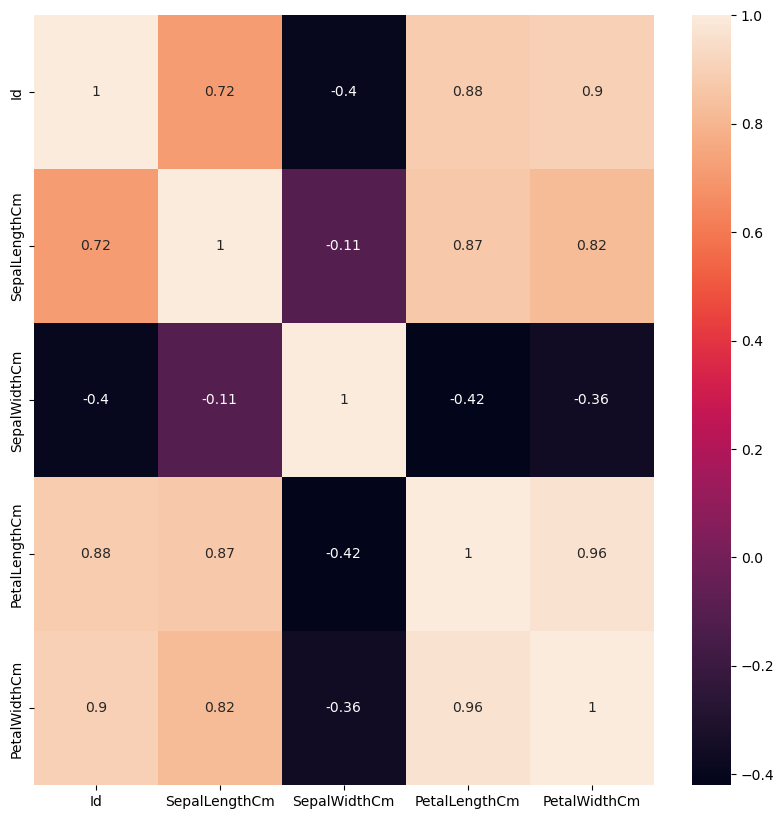

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(),annot=True)
plt.show()

In [53]:
## we could see multicollinearity between independend variable 

## Encoding

In [119]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [75]:
## -will work best when encoding target(the column that we are predicting)

## Model building

In [76]:
## train test split

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,classification_report

In [120]:
X = df.drop(['Id','Species'],axis = 1 )
y = df['Species']

In [121]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [122]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## Build the Decision Tree model using sklearn

In [123]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [124]:
dt_pred_train = dt.predict(xtrain)

In [125]:
dt_pred = dt.predict(xtest)

## Classification report of train set , test set and whole data set

In [126]:
print(classification_report(ytrain,dt_pred_train))
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Interpretation
Accuracy is 97% that is 97% of data have been correctly predicted from total observation out of the total dataset

here recall value of class 1 is 0.92 that means FN is more so our model fails to predict correctly for class 1